In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
df1 = pd.read_csv('C:/Users/vishn/Downloads/fear_greed_index.csv')
df1.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,01-02-2018
1,1517549400,15,Extreme Fear,02-02-2018
2,1517635800,40,Fear,03-02-2018
3,1517722200,24,Extreme Fear,04-02-2018
4,1517808600,11,Extreme Fear,05-02-2018


In [89]:
df2 = pd.read_csv('C:/Users/vishn/Downloads/historical_data.csv')
df2.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [90]:
df1['date'] = pd.to_datetime(df1['date'], format='%d-%m-%Y')
df2['Timestamp IST'] = pd.to_datetime(df2['Timestamp IST'], format='%d-%m-%Y %H:%M')


In [91]:
df2['trade_date'] = df2['Timestamp IST'].dt.date
df1['sentiment_date'] = df1['date'].dt.date


In [92]:
sentiment_map = {
    'Extreme Fear': 0,
    'Fear': 1,
    'Neutral': 2,
    'Greed': 3,
    'Extreme Greed': 4
}

In [93]:
df1['sentiment_score'] = df1['classification'].map(sentiment_map)

In [94]:
fear_greed_df = df1[['sentiment_date','sentiment_score', 'classification']]
historical_data_df = df2[['Account','Coin','Execution Price','Size Tokens','Size USD','Side','Closed PnL','Direction','trade_date']]


In [95]:
fear_greed_df.head()

,sentiment_date,sentiment_score,classification
0,2018-02-01,1,Fear
1,2018-02-02,0,Extreme Fear
2,2018-02-03,1,Fear
3,2018-02-04,0,Extreme Fear
4,2018-02-05,0,Extreme Fear


In [96]:
historical_data_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Closed PnL,Direction,trade_date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.0,Buy,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,0.0,Buy,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,0.0,Buy,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,0.0,Buy,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,0.0,Buy,2024-12-02


In [97]:
# Merge the two DataFrames on the date columns
merged_df = pd.merge(
    historical_data_df,
    fear_greed_df,
    left_on='trade_date',
    right_on='sentiment_date',
    how='left'
)
merged_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Closed PnL,Direction,trade_date,sentiment_date,sentiment_score,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed


In [98]:
# checking the number of trades with and without sentiment data
total_trades = len(merged_df)
matched_sentiment = merged_df['sentiment_score'].notna().sum()
unmatched_sentiment = total_trades - matched_sentiment
print(f"Total Trades: {total_trades}")
print(f"Matched Sentiment: {matched_sentiment}")
print(f"Unmatched Sentiment: {unmatched_sentiment}")
merged_df.head()


Total Trades: 211224
Matched Sentiment: 211218
Unmatched Sentiment: 6


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Closed PnL,Direction,trade_date,sentiment_date,sentiment_score,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,0.0,Buy,2024-12-02,2024-12-02,4.0,Extreme Greed


In [99]:
merged_df.to_csv('merged_data.csv', index=False)
# Save the merged DataFrame to a CSV file


In [100]:
# --- Feature Engineering ---
# Create a column to flag winning trades
merged_df['is_win'] = merged_df['Closed PnL'] > 0

In [101]:
# Clean up rows with missing sentiment data (small number of rows based on info())
analysis_df = merged_df.dropna(subset=['classification', 'trade_date']).copy()

print("Data Preparation Complete. Analysis DataFrame Head:")
print(analysis_df.head())

Data Preparation Complete. Analysis DataFrame Head:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side  Closed PnL Direction  trade_date  \
0       986.87   7872.16  BUY         0.0       Buy  2024-12-02   
1        16.00    127.68  BUY         0.0       Buy  2024-12-02   
2       144.09   1150.63  BUY         0.0       Buy  2024-12-02   
3       142.98   1142.04  BUY         0.0       Buy  2024-12-02   
4         8.73     69.75  BUY         0.0       Buy  2024-12-02   

  sentiment_date  sentiment_score classification  is_win  
0     2024-12-02              4.0  Extreme Greed   Fa

In [102]:
# --- 2. Custom Function with Error Handling ---
def calculate_win_rate(win_series):
    """Calculates win rate, handling division by zero."""
    count = win_series.count()
    
    # FIX: Check if the count is zero to prevent RuntimeWarning
    if count == 0:
        return 0.0  # Return 0.0 win rate if no trades occurred in the group
    
    return win_series.sum() / count

In [103]:
# --- Define Aggregation Functions ---
def calculate_win_rate(win_series):
    """Calculates the win rate (sum of True / total count) for a boolean Series."""
    # The input 'win_series' is ALREADY the 'is_win' column for the current group.
    return win_series.sum() / win_series.count()

In [104]:
# --- Group and Aggregate ---
daily_performance = analysis_df.groupby(['trade_date', 'classification', 'sentiment_score']).agg(
    total_pnl=('Closed PnL', 'sum'),
    avg_trade_pnl=('Closed PnL', 'mean'),
    avg_trade_size_usd=('Size USD', 'mean'),
    total_trades=('Account', 'count'),
    win_rate=('is_win', calculate_win_rate)
).reset_index()

daily_performance = daily_performance.sort_values(by='sentiment_score')

print("Daily Performance Metrics Head:")
print(daily_performance.head())

Daily Performance Metrics Head:
     trade_date classification  sentiment_score     total_pnl  avg_trade_pnl  \
414  2025-02-26   Extreme Fear              0.0  63229.063129      53.766210   
221  2024-08-06   Extreme Fear              0.0    267.318048       2.498300   
427  2025-03-11   Extreme Fear              0.0 -76880.729036     -23.396448   
454  2025-04-07   Extreme Fear              0.0  34527.370305      12.269854   
455  2025-04-08   Extreme Fear              0.0  34899.394798      37.008902   

     avg_trade_size_usd  total_trades  win_rate  
414         4206.597049          1176  0.670918  
221          574.564299           107  0.121495  
427         4265.657970          3286  0.187462  
454         5138.682708          2814  0.239161  
455         9405.505196           943  0.409332  


C:\Users\vishn\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in longlong_scalars
  """


In [105]:
# --- 4. Analyze Performance by Sentiment Classification ---
sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']

sentiment_summary = daily_performance.groupby('classification').agg(
    Avg_Daily_PnL=('total_pnl', 'mean'),
    Avg_Win_Rate=('win_rate', 'mean'),
    Avg_Trade_Size=('avg_trade_size_usd', 'mean'),
    Days_Observed=('trade_date', 'nunique')
).reset_index()

In [106]:
# Reorder the categories logically
sentiment_summary['classification'] = pd.Categorical(
    sentiment_summary['classification'],
    categories=sentiment_order,
    ordered=True
)
sentiment_summary = sentiment_summary.sort_values('classification').reset_index(drop=True)

print("\nPerformance Summary by Sentiment:")
print(sentiment_summary)


Performance Summary by Sentiment:
  classification  Avg_Daily_PnL  Avg_Win_Rate  Avg_Trade_Size  Days_Observed
0   Extreme Fear   52793.589178      0.327341     4091.804366             14
1           Fear   36891.818040      0.329112     6524.294937             91
2        Neutral   19297.323516      0.331886     7157.527121             67
3          Greed   11140.566181      0.335986     6735.295813            193
4  Extreme Greed   23817.292199      0.467424     4410.524482            114


In [107]:
# --- 5. Analyze Trading Behavior (Direction/Side) by Sentiment ---
sentiment_side_counts = analysis_df.groupby(['classification', 'Side']).size().unstack(fill_value=0)

In [108]:
# Calculate the proportion of 'BUY' trades for each sentiment
sentiment_side_counts['Total_Trades'] = sentiment_side_counts.sum(axis=1)
sentiment_side_counts['Buy_Proportion'] = sentiment_side_counts['BUY'] / sentiment_side_counts['Total_Trades']

In [109]:
# Reorder and clean up for display
sentiment_behavior = sentiment_side_counts[['BUY', 'SELL', 'Buy_Proportion']].reset_index()

# Apply the same logical order
sentiment_behavior['classification'] = pd.Categorical(
    sentiment_behavior['classification'],
    categories=sentiment_order,
    ordered=True
)
sentiment_behavior = sentiment_behavior.sort_values('classification').reset_index(drop=True)

print("\nTrader Behavior Summary (Buy/Sell Proportion) by Sentiment:")
print(sentiment_behavior)


Trader Behavior Summary (Buy/Sell Proportion) by Sentiment:
Side classification    BUY   SELL  Buy_Proportion
0      Extreme Fear  10935  10465        0.510981
1              Fear  30270  31567        0.489513
2           Neutral  18969  18717        0.503343
3             Greed  24576  25727        0.488559
4     Extreme Greed  17940  22052        0.448590



Visualizations saved as sentiment_performance_analysis.png


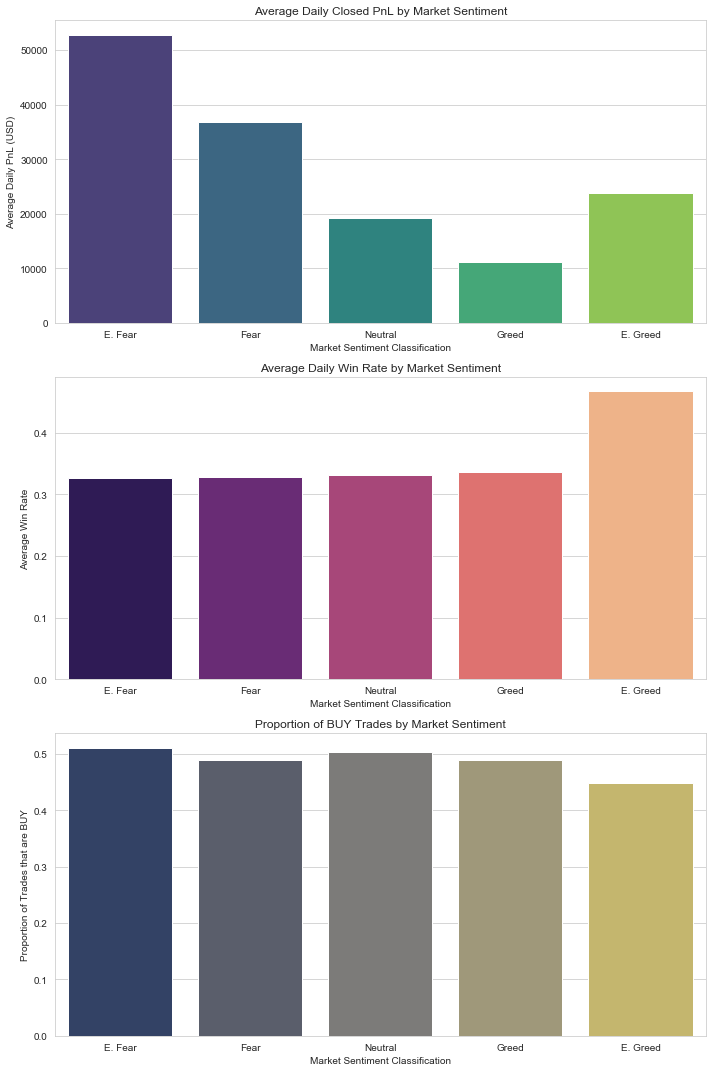

In [116]:
# --- 6. Visualization for Insights ---
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
sentiment_labels = ['E. Fear', 'Fear', 'Neutral', 'Greed', 'E. Greed']

# Plot 1: Average Daily PnL vs. Sentiment
sns.barplot(
    x='classification',
    y='Avg_Daily_PnL',
    data=sentiment_summary,
    palette='viridis',
    ax=axes[0]
)
axes[0].set_title('Average Daily Closed PnL by Market Sentiment')
axes[0].set_xlabel('Market Sentiment Classification')
axes[0].set_ylabel('Average Daily PnL (USD)')
axes[0].set_xticklabels(sentiment_labels)


# Plot 2: Average Win Rate vs. Sentiment
sns.barplot(
    x='classification',
    y='Avg_Win_Rate',
    data=sentiment_summary,
    palette='magma',
    ax=axes[1]
)
axes[1].set_title('Average Daily Win Rate by Market Sentiment')
axes[1].set_xlabel('Market Sentiment Classification')
axes[1].set_ylabel('Average Win Rate')
axes[1].set_xticklabels(sentiment_labels)


# Plot 3: Proportion of BUY Trades vs. Sentiment
sns.barplot(
    x='classification',
    y='Buy_Proportion',
    data=sentiment_behavior,
    palette='cividis',
    ax=axes[2]
)
axes[2].set_title('Proportion of BUY Trades by Market Sentiment')
axes[2].set_xlabel('Market Sentiment Classification')
axes[2].set_ylabel('Proportion of Trades that are BUY')
axes[2].set_xticklabels(sentiment_labels)

plt.tight_layout()
plt.savefig('sentiment_performance_analysis.png')
print("\nVisualizations saved as sentiment_performance_analysis.png")